# Targets whose value difference of the label between max and min is larger than threshold

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
af2_resolved_path = score_dir / 'af2_confidence_resolved.csv.gz'
af2_resolved_df = pd.read_csv(af2_resolved_path, index_col=0)
label_df = pd.merge(label_df, af2_resolved_df, on=['Target', 'Model'])
target_df = pd.read_csv(target_list, index_col=0)
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,pTM_resolved,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,model_1_ptm_seed_0_rec_10_ens_1,0.981,0.980,0.919,0.910,0.901,0.955,0.900,0.032,model_1_ptm,...,0.908,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
1,model_1_ptm_seed_0_rec_10_ens_8,0.981,0.979,0.916,0.910,0.901,0.956,0.901,0.019,model_1_ptm,...,0.910,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
2,model_1_ptm_seed_0_rec_1_ens_1,0.981,0.980,0.917,0.909,0.901,0.944,0.895,20.749,model_1_ptm,...,0.904,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
3,model_1_ptm_seed_0_rec_1_ens_8,0.980,0.979,0.917,0.910,0.901,0.947,0.896,20.749,model_1_ptm,...,0.905,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
4,model_1_ptm_seed_0_rec_2_ens_1,0.981,0.979,0.919,0.911,0.903,0.948,0.897,0.172,model_1_ptm,...,0.906,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187595,model_5_seed_1_rec_5_ens_1,0.987,0.971,0.873,NaN,NaN,0.964,NaN,0.054,model_5,...,NaN,6R6U_A,1.710,2018-08-08T00:00:00Z,>6r6u_A mol:protein length:462 Cis-aconitate ...,GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...,462,6,6,False
187596,model_5_seed_1_rec_6_ens_1,0.987,0.971,0.874,NaN,NaN,0.964,NaN,0.045,model_5,...,NaN,6R6U_A,1.710,2018-08-08T00:00:00Z,>6r6u_A mol:protein length:462 Cis-aconitate ...,GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...,462,6,6,False
187597,model_5_seed_1_rec_7_ens_1,0.987,0.971,0.874,NaN,NaN,0.963,NaN,0.044,model_5,...,NaN,6R6U_A,1.710,2018-08-08T00:00:00Z,>6r6u_A mol:protein length:462 Cis-aconitate ...,GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...,462,6,6,False
187598,model_5_seed_1_rec_8_ens_1,0.987,0.970,0.874,NaN,NaN,0.964,NaN,0.056,model_5,...,NaN,6R6U_A,1.710,2018-08-08T00:00:00Z,>6r6u_A mol:protein length:462 Cis-aconitate ...,GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...,462,6,6,False


In [4]:
# Check target number changing threshold
label = 'GDT_TS'
thresholds = [0.05, 0.10, 0.15, 0.20]
for threshold in thresholds:
    data = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > threshold)
    print(threshold, data['Target'].unique().size)
    print(data['Target'].unique())

0.05 165
['6P58_A' '6EXU_A' '6S9A_A' '6SP9_A' '7CMZ_A' '5Z49_B' '6FRR_A' '7EG3_P'
 '6R09_A' '7BER_A' '5QII_A' '7A8S_A' '6XM2_I' '6YA1_A' '5ZOE_A' '7MQ5_A'
 '6AWI_A' '6TRK_A' '6NW2_A' '7L4C_A' '6XPB_B' '5OND_A' '7COH_O' '6LCH_A'
 '6G2V_A' '6JFK_A' '6DHP_u' '6IPY_A' '6Z4N_AAA' '6WXD_A' '6PNV_A' '6CZQ_B'
 '6CFV_A' '6LTF_A' '5WHF_A' '6H6Y_A' '6E5X_A' '6LR8_A' '6XXV_C' '6AC0_A'
 '6QMS_C' '6ODD_A' '6N9H_A' '6ONC_D' '6HR0_A' '6D28_A' '6BJG_A' '7M13_A'
 '7NUG_A' '6BZ5_A' '6MCY_A' '6P7Z_A' '7CUS_A' '7NDY_A' '7D1X_A' '6N7L_A'
 '6NEK_A' '7KCT_A' '6WQM_A' '6BKX_A' '6HYY_A' '5OBY_A' '6XHV_1Y' '6LH8_A'
 '6WVH_A' '7N50_A' '5VTL_A' '6NES_A' '6Z4U_A' '6TJB_B' '6SW4_A' '6H24_A'
 '5Y6H_A' '6MRN_A' '6S4C_A' '6IS9_A' '6I1M_A' '6W3G_A' '6E0O_A' '5XP0_A'
 '7CV7_A' '6JD5_A' '6T8D_X' '7EL1_E' '6NZ4_A' '7CM1_B' '6HLK_A' '6GT9_A'
 '6I6H_A' '6DS9_A' '6T85_A' '6RRV_A' '6JU8_A' '7KIH_A' '6LG2_A' '7LCZ_A'
 '6XOD_A' '6RO0_B' '6N1F_A' '6W40_A' '6H7B_A' '5Y24_A' '6SCF_A' '6GYT_A'
 '6GUS_A' '6IN9_A' '6SRN_A' '6KZ7_B' '6

In [5]:
label = 'GDT_TS'
threshold = 0.05
fil_df = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > threshold)
print(threshold, fil_df['Target'].unique().size)
print(fil_df['Target'].unique())

0.05 165
['6P58_A' '6EXU_A' '6S9A_A' '6SP9_A' '7CMZ_A' '5Z49_B' '6FRR_A' '7EG3_P'
 '6R09_A' '7BER_A' '5QII_A' '7A8S_A' '6XM2_I' '6YA1_A' '5ZOE_A' '7MQ5_A'
 '6AWI_A' '6TRK_A' '6NW2_A' '7L4C_A' '6XPB_B' '5OND_A' '7COH_O' '6LCH_A'
 '6G2V_A' '6JFK_A' '6DHP_u' '6IPY_A' '6Z4N_AAA' '6WXD_A' '6PNV_A' '6CZQ_B'
 '6CFV_A' '6LTF_A' '5WHF_A' '6H6Y_A' '6E5X_A' '6LR8_A' '6XXV_C' '6AC0_A'
 '6QMS_C' '6ODD_A' '6N9H_A' '6ONC_D' '6HR0_A' '6D28_A' '6BJG_A' '7M13_A'
 '7NUG_A' '6BZ5_A' '6MCY_A' '6P7Z_A' '7CUS_A' '7NDY_A' '7D1X_A' '6N7L_A'
 '6NEK_A' '7KCT_A' '6WQM_A' '6BKX_A' '6HYY_A' '5OBY_A' '6XHV_1Y' '6LH8_A'
 '6WVH_A' '7N50_A' '5VTL_A' '6NES_A' '6Z4U_A' '6TJB_B' '6SW4_A' '6H24_A'
 '5Y6H_A' '6MRN_A' '6S4C_A' '6IS9_A' '6I1M_A' '6W3G_A' '6E0O_A' '5XP0_A'
 '7CV7_A' '6JD5_A' '6T8D_X' '7EL1_E' '6NZ4_A' '7CM1_B' '6HLK_A' '6GT9_A'
 '6I6H_A' '6DS9_A' '6T85_A' '6RRV_A' '6JU8_A' '7KIH_A' '6LG2_A' '7LCZ_A'
 '6XOD_A' '6RO0_B' '6N1F_A' '6W40_A' '6H7B_A' '5Y24_A' '6SCF_A' '6GYT_A'
 '6GUS_A' '6IN9_A' '6SRN_A' '6KZ7_B' '6

In [6]:
diff_label = fil_df.groupby('Target').apply(lambda x: x[label].max() - x[label].min()).sort_values()
diff_label

Target
6Y7F_A   0.050
6XPB_B   0.050
6QMS_C   0.051
6KXF_C   0.051
7COH_O   0.052
          ... 
6R6U_A   0.495
6EXU_A   0.552
6E3A_A   0.569
6EDE_A   0.570
5VTL_A   0.596
Length: 165, dtype: float64

<AxesSubplot:ylabel='Target'>

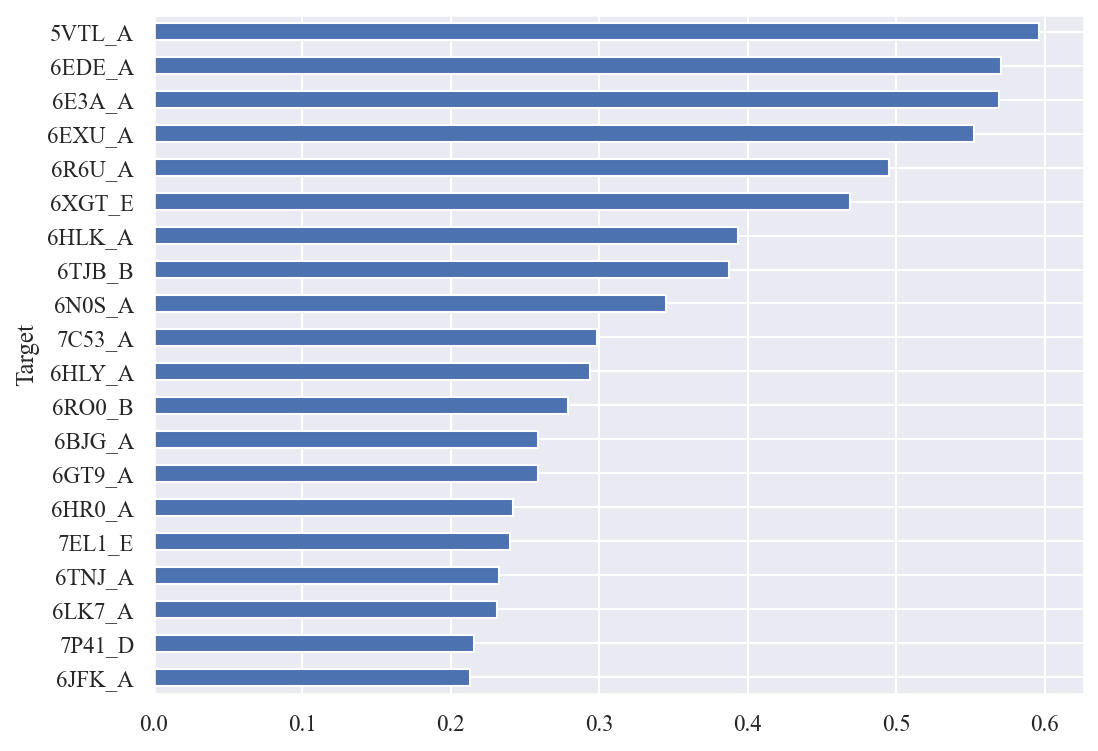

In [7]:
diff_label[-20:].plot(kind='barh', figsize=(8, 6))

In [8]:
import matplotlib.cm as cm
def boxplot_labels(df, labels, y='Target', figsize=(10, 8)):
    fig, axes = plt.subplots(nrows=1, ncols=len(labels), sharex=False, sharey=True, figsize=figsize)
    for i, label in enumerate(labels):
        sns.boxplot(data=df, y=y, x=label, ax=axes[i], color=cm.Set2(i / len(labels)))
    for i in range(1, len(axes)):
        axes[i].set_ylabel('')
    plt.tight_layout()

In [9]:
diff_label

Target
6Y7F_A   0.050
6XPB_B   0.050
6QMS_C   0.051
6KXF_C   0.051
7COH_O   0.052
          ... 
6R6U_A   0.495
6EXU_A   0.552
6E3A_A   0.569
6EDE_A   0.570
5VTL_A   0.596
Length: 165, dtype: float64

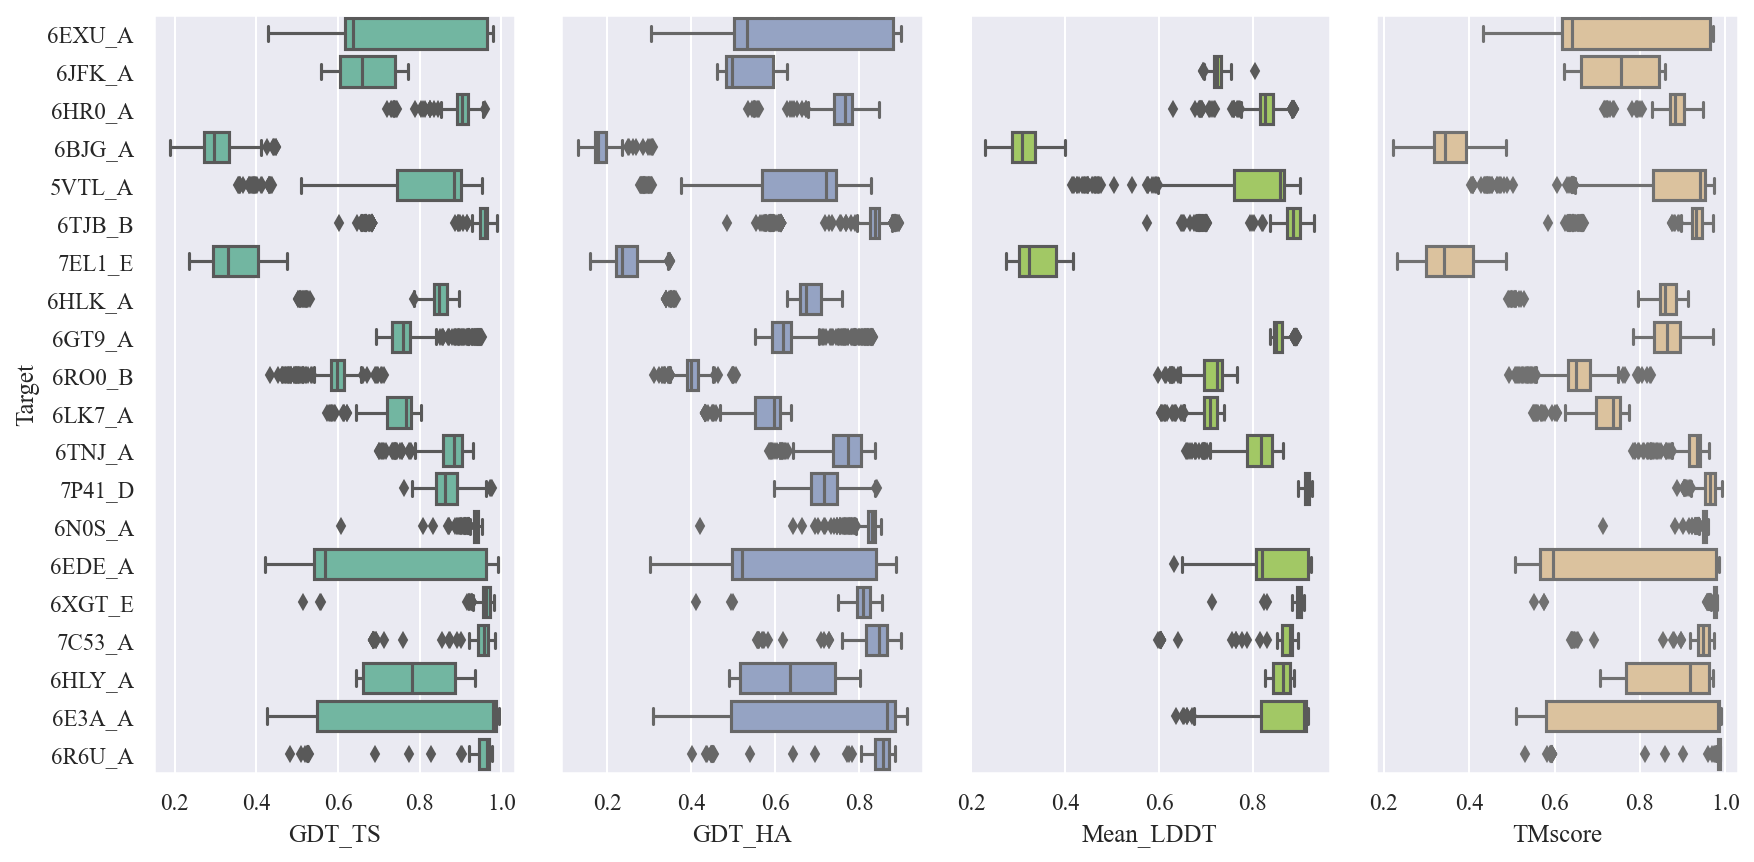

In [10]:
labels = ['GDT_TS', 'GDT_HA', 'Mean_LDDT', 'TMscore']
target_num = 20
targets = diff_label[-target_num:].index
boxplot_labels(fil_df.query('Target in @targets'), labels, figsize=(12, 6))

In [12]:
def scatter(df, x, y, col_wrap=4, lim=(0.7, 1)):
    g = sns.relplot(data=df, kind='scatter', x=x, y=y, col='Target', col_wrap=col_wrap)
    g.set(xlim=lim, ylim=lim)
    plt.subplots_adjust(wspace=0.1)
label = 'GDT_TS'
score = 'pLDDT_resolved'
scatter(fil_df, x=score, y=label, lim=(0.3, 1.0), col_wrap=5)